In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import os
import sys
import re
import plotly.express as px
import plotly.graph_objects as go
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
from utils import process_tweet

In [15]:
data = pd.read_csv("../data/processed/processed_tweets_TWTR_2022.csv")
data.head()
#processing and cleaning the data
data["clean_tweet"] = data["text"].map(lambda x : process_tweet(x))

In [16]:
# pulling the tesla tweets and vectorizing them

tweets = data["clean_tweet"]
tweets.sample()


482    pfizer , audi, general mills, , are pausing  a...
Name: clean_tweet, dtype: object

In [17]:
model_dir = '../model-training/trained_models/'
vec_file = model_dir+'vectorizer-logistics.pickle'
load_vect = pickle.load(open(vec_file, 'rb'))
tweets_vectorized = load_vect.transform(tweets)
tweets_vectorized.get_shape()

(10126, 378164)

In [18]:
file_name = model_dir+'logistics_regression.sav'
loaded_model = pickle.load(open(file_name, 'rb'))
data["predictions"] = loaded_model.predict(tweets_vectorized)

In [19]:
data["predictions"].value_counts()

1    8425
0    1701
Name: predictions, dtype: int64

In [20]:
#Storing the data with predicted sentiment labels
data.to_csv('../data/output/tweets_twtr_2022_prediction.csv')

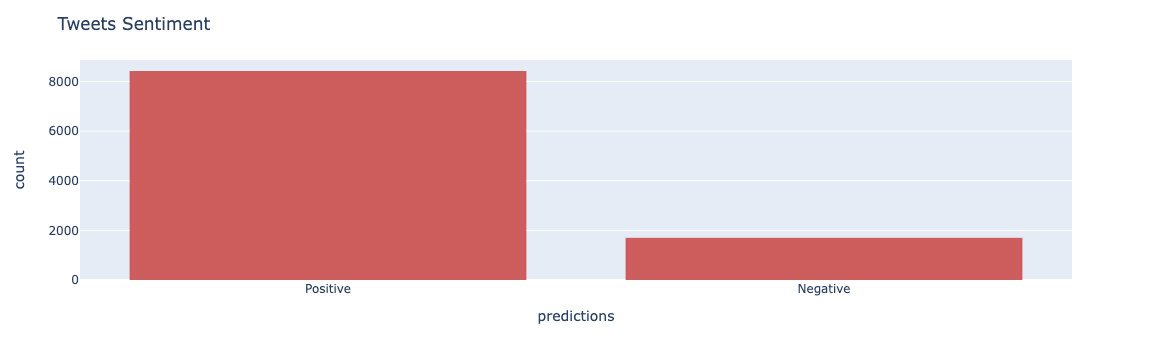

In [21]:
#Histogram to display tweets sentiment
tweet_predictions_senti = data
tweet_predictions_senti["predictions"] = tweet_predictions_senti["predictions"].replace({1:'Positive'})
tweet_predictions_senti["predictions"] = tweet_predictions_senti["predictions"].replace({0:'Negative'})
fig = px.histogram(tweet_predictions_senti, x="predictions")
fig.update_traces(marker_color="indianred", marker_line_color='black')
fig.update_layout(title_text="Tweets Sentiment")
fig.show()

In [22]:
tweet_predictions_senti.head()

,Unnamed: 0,tweet_id,created_at,text,location,clean_tweet,predictions
0,0,1587956601805328384,2022-11-02 23:55:31+00:00,“Because it’s not worth it ($8)” #TWTR https:/...,16577908,“because it’s not worth it ()” #twtr https://t...,Positive
1,1,1587955218242998272,2022-11-02 23:50:01+00:00,Now that #twtr proved to become the worlds pre...,1402496550,now that #twtr proved to become the worlds pre...,Positive
2,2,1587954183810043904,2022-11-02 23:45:54+00:00,RT @emrahvsibel: #GLCVY #tsla #aapl #nvda #twt...,1110896274637799424,rt @emrahvsibel: #glcvy #tsla #aapl #nvda #twt...,Positive
3,3,1587951811226652672,2022-11-02 23:36:29+00:00,$TSLA. #Elon great job keeping everyone busy w...,1243079728526917633,. #elon great job keeping everyone busy with y...,Positive
4,4,1587949571648413696,2022-11-02 23:27:35+00:00,OR\n- buy $8 worth of $XPR\n- create a #webaut...,1491505059624062985,or\n- buy worth of \n- create a #webauth wall...,Positive


In [23]:
tweet_predictions_senti.to_csv('../data/output/tweets_twtr_2022_prediction_label.csv')